## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4) Load data
#### Top 5 rows

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


#### bottom 5 rows

In [3]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


# 5) gdp_df INFO

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# 6) Drop the Value Footnotes column and rename

In [5]:
gdp_df_clean = gdp_df.drop('Value Footnotes', axis=1)
gdp_df_clean = gdp_df_clean.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


# 7)How many countries have data for all years? Which countries are missing many years of data?

In [45]:
gdp_df_clean['Year'].agg(['min', 'max'])
num_years = gdp_df_clean['Year'].max() +1  - gdp_df_clean['Year'].min()
print('Total number of years: ' + str(num_years))

Total number of years: 33


In [46]:
countries_year_count = gdp_df_clean['Country'].value_counts().reset_index()

In [47]:
n = 0
m = 0
for year_count in countries_year_count['count']:
    if year_count == num_years:
        n += 1
    else:
        m += 1
print(str(n) + ' have data for all years')
print(str(m) + ' do not have data for all years')

202 have data for all years
40 do not have data for all years


#### 202 have data for all years  
40 do not have data for all years

In [48]:
countries_all_years = pd.array(countries_year_count[countries_year_count['count'] == num_years]['Country'])
countries_missing_years = pd.array(countries_year_count[countries_year_count['count'] != num_years]['Country'])

#### Num of Countries with all years

In [49]:
len(countries_all_years)

202

#### Num of Countries missing years

In [50]:
len(countries_missing_years)

40

#### List of Countries with all years

In [41]:
# countries_all_years

#### List of Countries missing years

In [42]:
# countries_missing_years

# 8)  create some plots to show the distribution of GDP per capita for the year 2020

###  Create a histogram, a density plot, a boxplot, and a violin plotZ

In [59]:
gdp_2020 = gdp_df_clean[gdp_df_clean['Year'] == 2020]

#### Histogram

C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


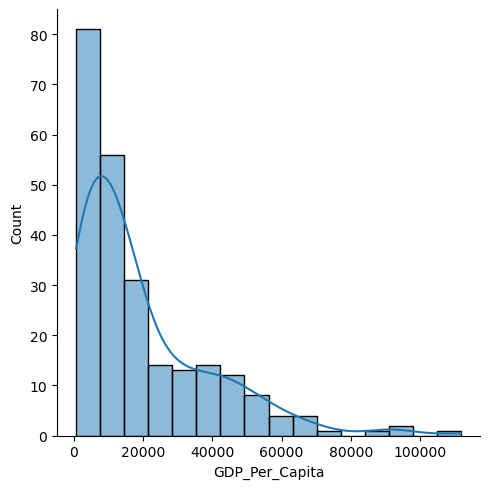

In [97]:
# Plot the histogram thanks to the displot function

sns.displot( data=gdp_2020['GDP_Per_Capita'],
            kde=True )

#### Density Plot

C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

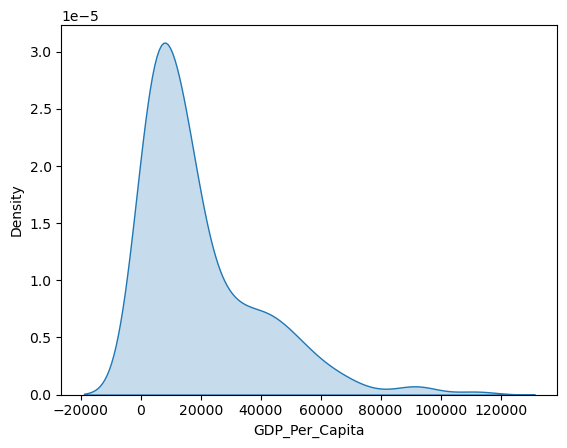

In [95]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'],
            fill=True)

#### Box Plot

<Axes: ylabel='GDP_Per_Capita'>

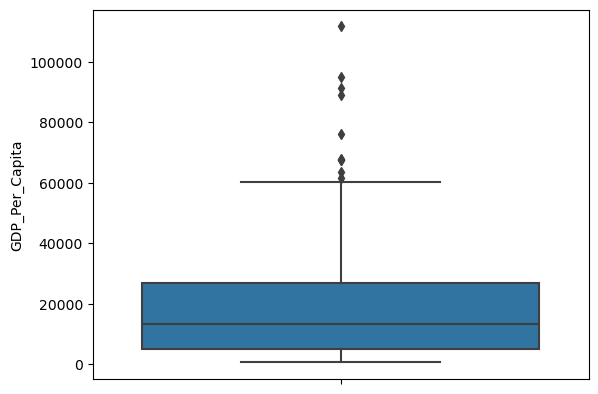

In [71]:
sns.boxplot(y=gdp_2020['GDP_Per_Capita'])

#### Violin Plot

<Axes: ylabel='GDP_Per_Capita'>

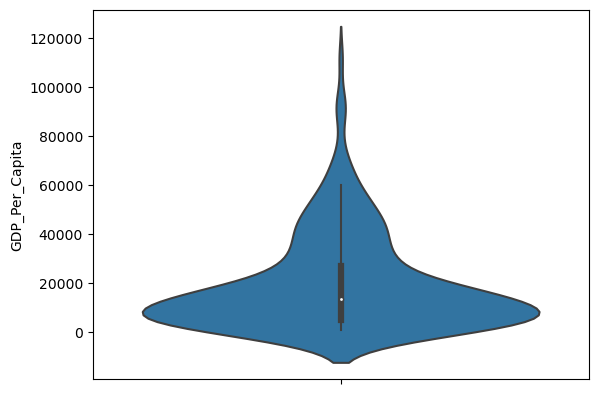

In [72]:
sns.violinplot(y=gdp_2020['GDP_Per_Capita'])

### These plots all show the same information in different ways.

### a vast majority of the GDP's are below 20,000

# 9) What was the median GDP per capita value in 2020?

In [81]:
round(gdp_2020['GDP_Per_Capita'].median(), 2)

13358.0

## 10) Compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [86]:
gdp_decades = gdp_df_clean[gdp_df_clean['Year'].isin([1990, 2000, 2010, 2020])]

#### Boxplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

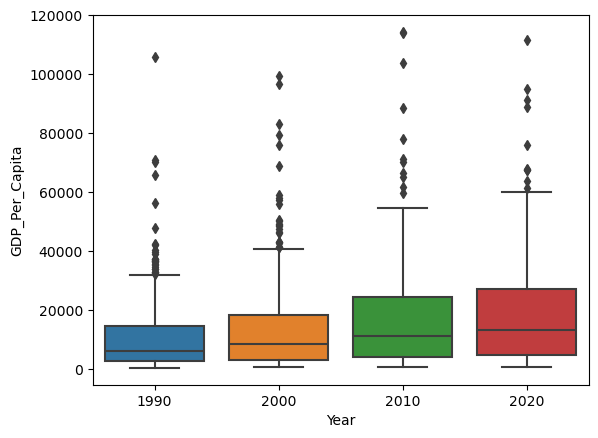

In [87]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

#### Bar Chart

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

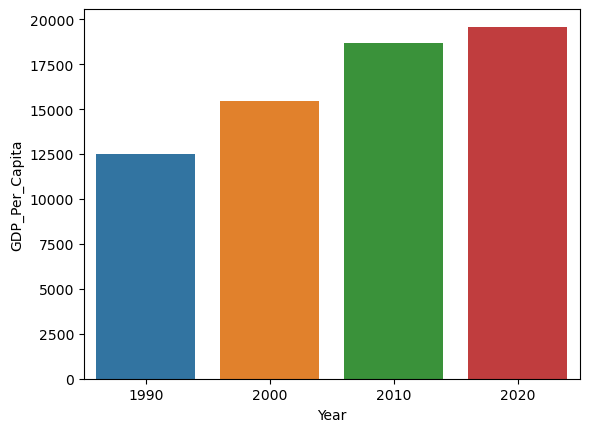

In [120]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades,
    errorbar=None)

#### Scatterplot

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

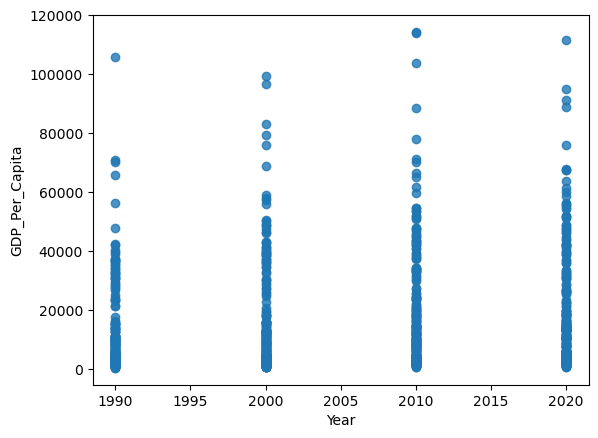

In [104]:
sns.regplot(x=gdp_decades['Year'],
            y=gdp_decades['GDP_Per_Capita'],
           fit_reg=False)

#### Scatterplot with Regression Line

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

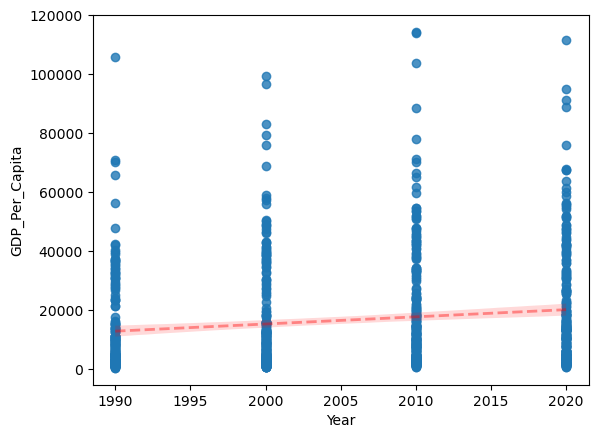

In [103]:
sns.regplot(x=gdp_decades['Year'],
            y=gdp_decades['GDP_Per_Capita'],
            line_kws={
                        "color": "r",
                        "alpha": 0.4,
                        "lw": 2,
                        "ls": "--"
                        }
           )

#### All of these graphs show that the gdp is increasing over the decades

#### Scatterplots can be helpful, but for this use-case, the scatter plot doesn't show us much until you add in the regression line.

#### Both the box plot and the bar chart are helpful and easy to read and understand the change over the decades.

# 11) Which country was the first to have a GDP per capita greater than $100,000?

In [127]:
gdp_greaterthan_100000 = gdp_df_clean[gdp_df_clean['GDP_Per_Capita'] > 100000]
gdp_greaterthan_100000.loc[gdp_greaterthan_100000['Year'].idxmin()]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 7302, dtype: object

# 12) Which country had the highest GDP per capita in 2020?

In [129]:
gdp_2020.sort_values('GDP_Per_Capita',
                     ascending=False)

highest_gdp_2020_country = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]['Country']

## Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [132]:
gdp_luxembourg = gdp_df_clean[gdp_df_clean['Country'] == highest_gdp_2020_country]